Submission proyek analisis data
- **Nama:** Ahmad Adib Syaifulloh
- **Email:** ahmadadibsyaifulloh@gmail.com
- **Username:** adib_syaa

# Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda di setiap musim?

2. Apakah suhu memengaruhi jumlah pengguna terdaftar pada hari kerja dibandingkan hari libur?

# Import Libarary

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Import Dataset

In [ ]:
# Membaca dataset
df = pd.read_csv('day.csv')

# Menampilkan 5 baris pertama data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Assessing Data

In [ ]:
# Memeriksa tipe data dan missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Tidak ada nilai yang kosong

# Data Cleaning

Data sudah bersih dan siap untuk analisis lebih lanjut

# Exploratory Data Analysis

## Korelasi Antar Kolom

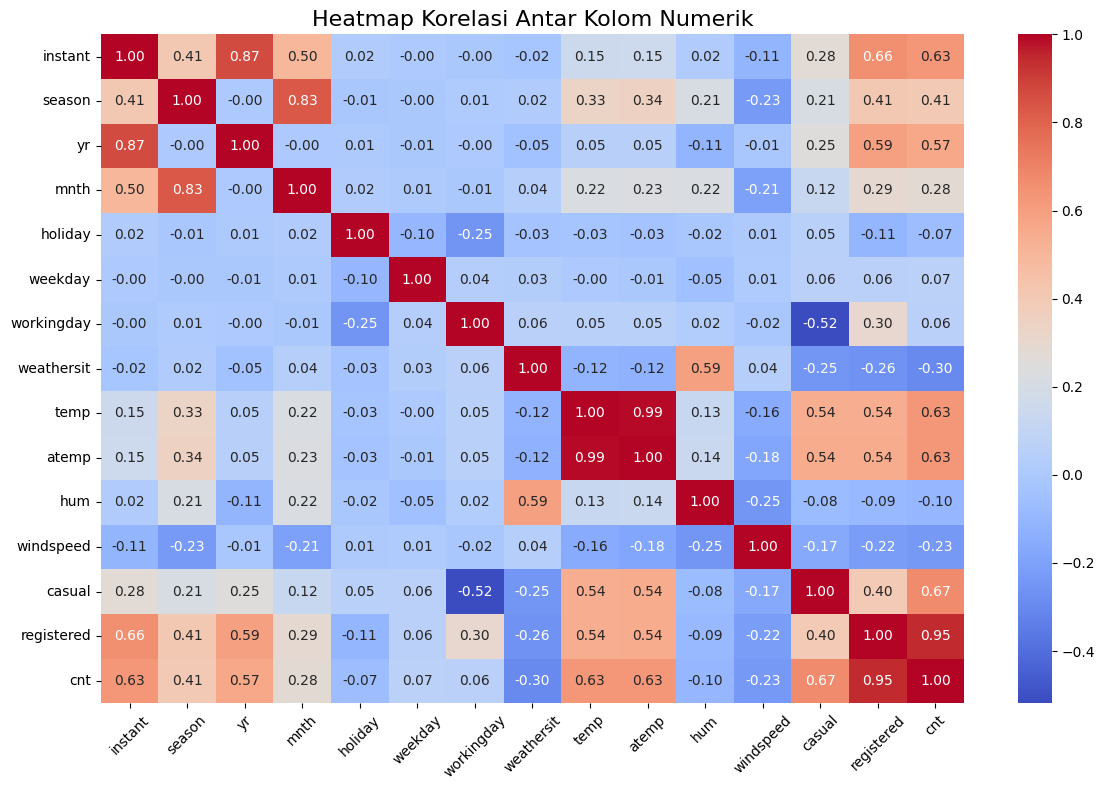

In [ ]:
# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi antar kolom numerik
correlation_matrix = numeric_df.corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi Antar Kolom Numerik", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Penjelasan :

1. Heatmap menunjukkan hubungan antar variabel dalam dataset.

2. Nilai korelasi berkisar dari -1 hingga 1:
- Positif: Hubungan langsung (satu naik, yang lain naik).
- Negatif: Hubungan terbalik (satu naik, yang lain turun).
- Nol: Tidak ada hubungan linier.

## Visualisasi Hubungan Antar Variabel (Scatter Plot)

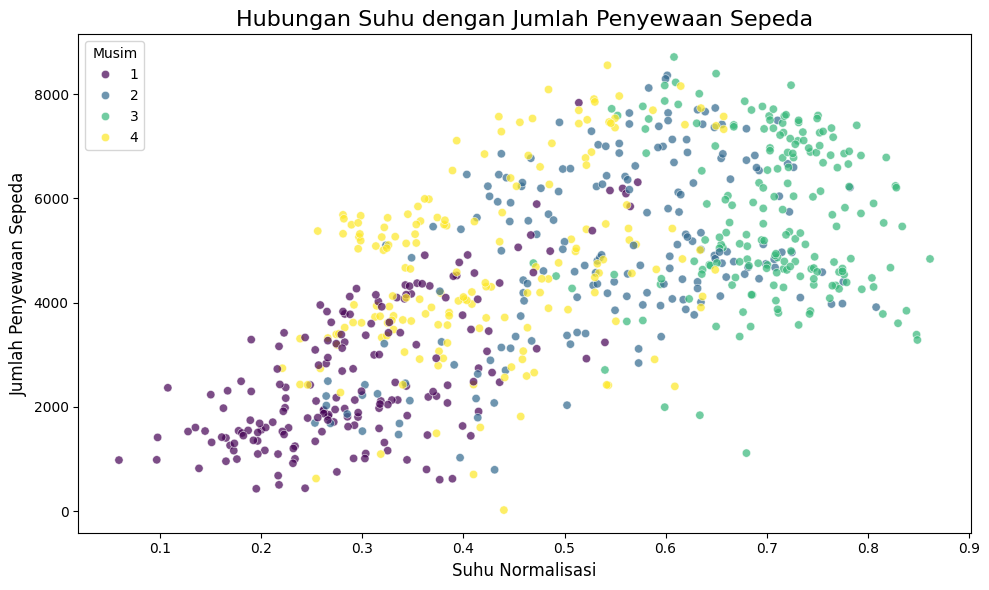

In [ ]:
# Scatter plot untuk hubungan antara suhu dan jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df, hue='season', palette='viridis', alpha=0.7)

# Menyesuaikan tampilan plot
plt.title('Hubungan Suhu dengan Jumlah Penyewaan Sepeda', fontsize=16)
plt.xlabel('Suhu Normalisasi', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.legend(title='Musim', loc='upper left')
plt.tight_layout()

# Menampilkan scatter plot
plt.show()


Penjelasan

1. Scatter plot menunjukkan bagaimana suhu memengaruhi jumlah penyewaan sepeda.
2. Variabel season digunakan sebagai kategori untuk memberikan warna pada titik-titik berdasarkan musim.

## Analisis Distribusi Variabel

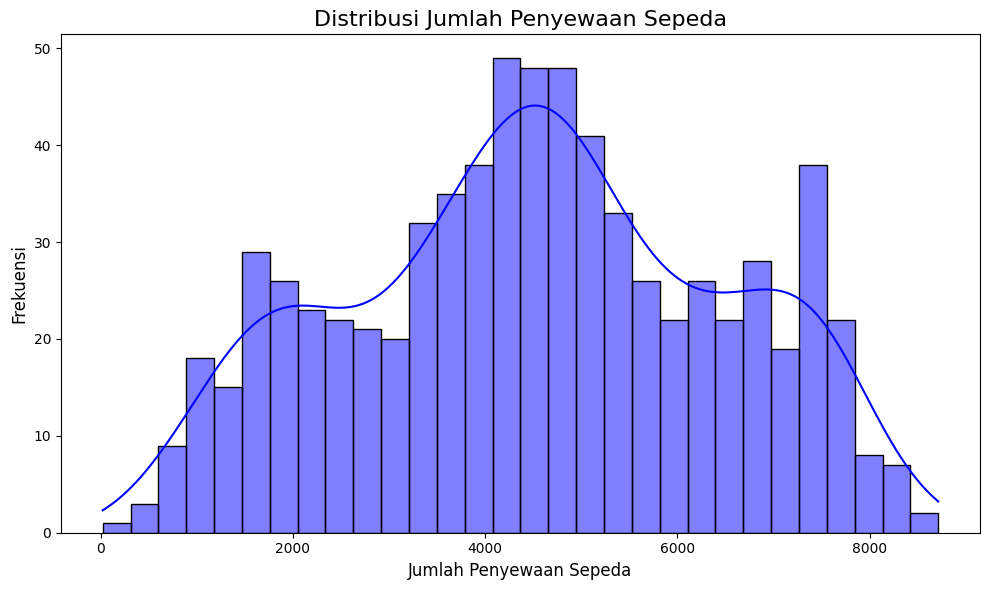

In [ ]:
# Histogram distribusi jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True, color='blue')

# Menyesuaikan tampilan histogram
plt.title('Distribusi Jumlah Penyewaan Sepeda', fontsize=16)
plt.xlabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.tight_layout()

# Menampilkan histogram
plt.show()


## Kesimpulan EDA

1. Heatmap: Mengidentifikasi hubungan kuat antara temp (suhu) dan cnt (jumlah penyewaan sepeda), serta variabel lain seperti registered.
2. Scatter Plot: Menunjukkan bahwa suhu yang lebih tinggi cenderung meningkatkan jumlah penyewaan sepeda.
3. Histogram Distribusi: Distribusi jumlah penyewaan sepeda menunjukkan pola tertentu yang dapat dianalisis lebih lanjut.

# Data Visualization

## Visualisasi 1: Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda di Setiap Musim

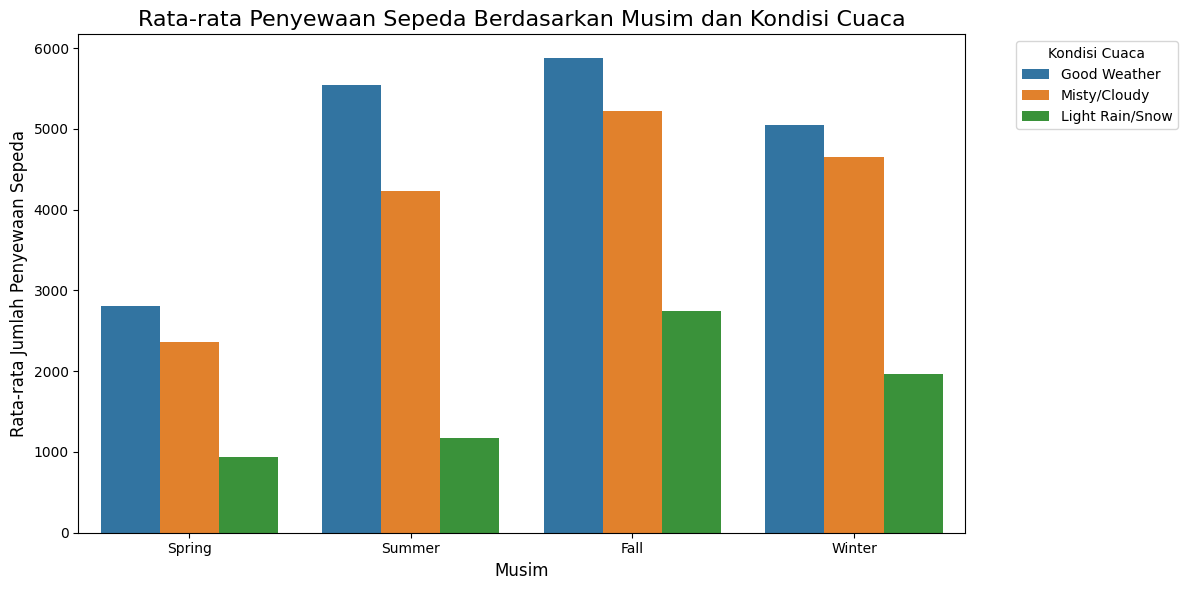

In [ ]:
# Mengelompokkan data berdasarkan musim dan kondisi cuaca, menghitung rata-rata penyewaan sepeda
season_weather_rentals = df.groupby(['season', 'weathersit'])['cnt'].mean().reset_index()

# Mapping untuk mengganti kode numerik dengan label deskriptif
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Good Weather', 2: 'Misty/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}

# Mengganti nilai numerik dengan label deskriptif
season_weather_rentals['season'] = season_weather_rentals['season'].map(season_map)
season_weather_rentals['weathersit'] = season_weather_rentals['weathersit'].map(weather_map)

# Membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', hue='weathersit', data=season_weather_rentals)

# Menyesuaikan tampilan plot
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim dan Kondisi Cuaca', fontsize=16)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Kondisi Cuaca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Menampilkan plot
plt.show()


Grafik menunjukkan bahwa kondisi cuaca yang baik meningkatkan jumlah penyewaan sepeda di semua musim.

## Visualisasi 2: Hubungan Suhu dengan Pengguna Terdaftar pada Hari Kerja vs Hari Libur

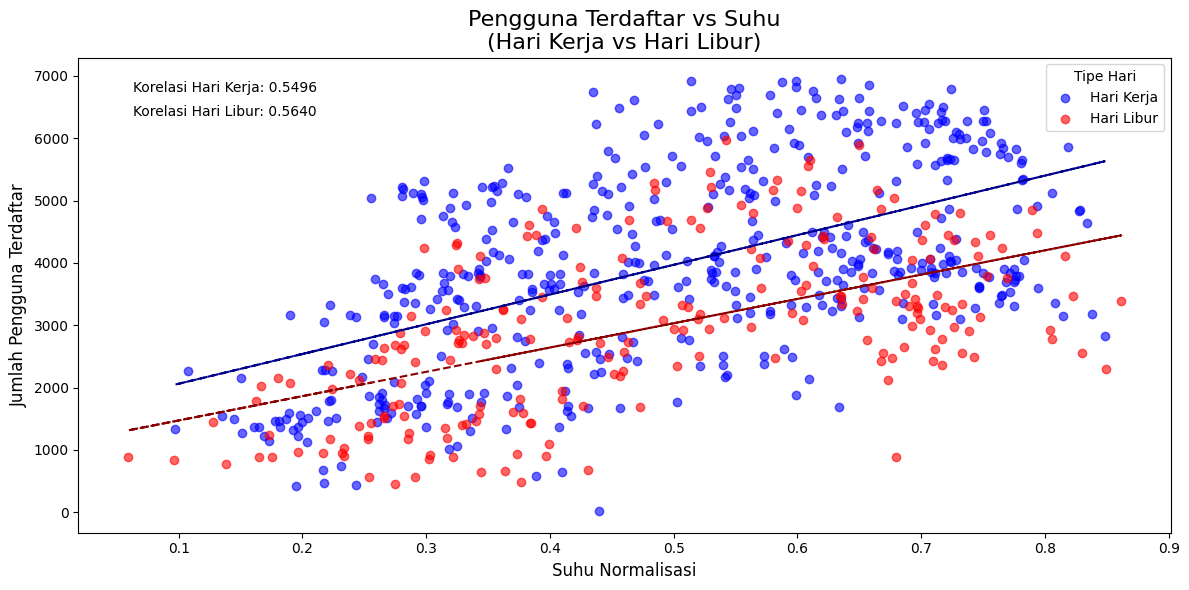

In [ ]:
import numpy as np

# Membuat scatter plot
plt.figure(figsize=(12, 6))

# Data untuk hari kerja (working day)
working_days = df[df['workingday'] == 1]
plt.scatter(working_days['temp'], working_days['registered'],
            label='Hari Kerja', alpha=0.6, color='blue')

# Data untuk hari libur (non-working day)
non_working_days = df[df['workingday'] == 0]
plt.scatter(non_working_days['temp'], non_working_days['registered'],
            label='Hari Libur', alpha=0.6, color='red')

# Garis tren untuk hari kerja
z_working = np.polyfit(working_days['temp'], working_days['registered'], 1)
p_working = np.poly1d(z_working)
plt.plot(working_days['temp'], p_working(working_days['temp']),
         color='darkblue', linestyle='--')

# Garis tren untuk hari libur
z_non_working = np.polyfit(non_working_days['temp'], non_working_days['registered'], 1)
p_non_working = np.poly1d(z_non_working)
plt.plot(non_working_days['temp'], p_non_working(non_working_days['temp']),
         color='darkred', linestyle='--')

# Menghitung koefisien korelasi
corr_working = working_days['temp'].corr(working_days['registered'])
corr_non_working = non_working_days['temp'].corr(non_working_days['registered'])

# Menyesuaikan tampilan plot
plt.title('Pengguna Terdaftar vs Suhu\n(Hari Kerja vs Hari Libur)', fontsize=16)
plt.xlabel('Suhu Normalisasi', fontsize=12)
plt.ylabel('Jumlah Pengguna Terdaftar', fontsize=12)
plt.legend(title='Tipe Hari', loc='best')

# Menambahkan informasi korelasi pada plot
plt.annotate(f'Korelasi Hari Kerja: {corr_working:.4f}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=10, ha='left', va='top')
plt.annotate(f'Korelasi Hari Libur: {corr_non_working:.4f}',
             xy=(0.05, 0.90), xycoords='axes fraction',
             fontsize=10, ha='left', va='top')

plt.tight_layout()

# Menampilkan plot
plt.show()


Grafik menunjukkan hubungan positif antara suhu dan jumlah pengguna terdaftar pada hari kerja maupun hari libur, dengan korelasi yang sedikit lebih tinggi pada hari libur.

# Kesimpulan Analisis Data

## Permasalahan 1

Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda di setiap musim?

Hasil Analisis :

- Kondisi cuaca memiliki pengaruh signifikan
terhadap jumlah penyewaan sepeda.

- Pada semua musim, penyewaan sepeda tertinggi terjadi pada kondisi cuaca yang baik (Good Weather). Sebaliknya, kondisi cuaca buruk seperti hujan lebat atau salju (Heavy Rain/Snow) secara konsisten menurunkan jumlah penyewaan.

- Musim gugur (Fall) menunjukkan rata-rata penyewaan tertinggi dibandingkan musim lain, terutama ketika cuaca mendukung.


---


Kesimpulan Bisnis:

- Strategi operasional seperti penambahan sepeda atau promosi dapat difokuskan pada musim gugur dan hari-hari dengan prakiraan cuaca baik untuk memaksimalkan pendapatan.

- Pada kondisi cuaca buruk, penyedia layanan dapat mempertimbangkan pengurangan operasional untuk efisiensi biaya.


## Permasalahan 2

Apakah suhu memengaruhi jumlah pengguna terdaftar pada hari kerja dibandingkan hari libur?

- Terdapat korelasi positif antara suhu (temp) dan jumlah pengguna terdaftar (registered), baik pada hari kerja maupun hari libur.
- Korelasi pada hari kerja adalah 0.5496, sedangkan pada hari libur sedikit lebih tinggi, yaitu 0.5640.
- Jumlah pengguna terdaftar cenderung lebih tinggi pada hari kerja dibandingkan hari libur untuk suhu yang sama, menunjukkan pola penggunaan yang berbeda.


---


Kesimpulan Bisnis:

- Suhu yang lebih tinggi mendorong peningkatan penggunaan sepeda oleh pengguna terdaftar. Oleh karena itu, promosi atau penawaran khusus dapat difokuskan pada hari-hari dengan suhu hangat.

- Pada hari kerja, layanan dapat dioptimalkan untuk memenuhi kebutuhan pengguna terdaftar yang lebih aktif.



## Rekomendasi Bisnis

1. Peningkatan Operasional Berdasarkan Cuaca dan Musim:

- Fokuskan sumber daya pada musim gugur dan kondisi cuaca baik untuk memaksimalkan penyewaan.
- Pertimbangkan pengurangan operasional selama kondisi cuaca ekstrem untuk efisiensi.

2. Penyesuaian Layanan Berdasarkan Suhu dan Jenis Hari:

- Promosikan layanan pada hari-hari dengan suhu hangat, terutama kepada pengguna terdaftar.
- Optimalkan layanan selama hari kerja untuk memenuhi permintaan yang lebih tinggi dari pengguna terdaftar.